In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,VotingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from xgboost import XGBRegressor


In [2]:
df = pd.read_csv('Final_df.csv')
df.head()

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City,AQI_Bucket,day
0,0,83.13,191.370,6.93,28.71,33.72,6.350,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad,Poor,weekday
1,1,79.84,199.052,13.85,28.68,41.08,12.860,13.85,48.49,97.07,0.04,0.00,328.0,Ahmedabad,Very Poor,weekday
2,2,94.52,119.556,24.39,32.66,52.61,7.492,24.39,67.39,111.33,0.24,0.01,514.0,Ahmedabad,Severe,Weekend
3,3,135.99,149.970,43.48,42.08,84.57,6.428,43.48,75.23,102.70,0.40,0.04,782.0,Ahmedabad,Severe,Weekend
4,4,178.33,154.718,54.56,35.31,72.80,7.260,54.56,55.04,107.38,0.46,0.06,914.0,Ahmedabad,Severe,weekday


In [4]:
df.drop('Unnamed: 0',axis = 1,inplace= True)

In [6]:
df.drop('AQI_Bucket',axis = 1,inplace= True)

In [7]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['day'].replace({'weekday':0,'Weekend':1},inplace = True)

In [9]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City,day
0,83.13,191.370,6.93,28.71,33.72,6.350,6.93,49.52,59.76,0.02,0.00,209.0,0,0
1,79.84,199.052,13.85,28.68,41.08,12.860,13.85,48.49,97.07,0.04,0.00,328.0,0,0
2,94.52,119.556,24.39,32.66,52.61,7.492,24.39,67.39,111.33,0.24,0.01,514.0,0,1
3,135.99,149.970,43.48,42.08,84.57,6.428,43.48,75.23,102.70,0.40,0.04,782.0,0,1
4,178.33,154.718,54.56,35.31,72.80,7.260,54.56,55.04,107.38,0.46,0.06,914.0,0,0


In [10]:
x = df.drop('AQI',axis = 1)
y = df['AQI']

In [14]:
sc =StandardScaler()
x.iloc[:,:-2] = sc.fit_transform(x.iloc[:,:-2])

In [15]:
x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,City,day
0,0.254217,0.651623,-0.476821,-0.004824,0.091393,-0.743025,0.654868,2.016799,1.159335,-0.219486,-0.437016,0,0
1,0.201756,0.733869,-0.166652,-0.006047,0.335071,-0.472774,1.639705,1.957692,2.890284,-0.218242,-0.437016,0,0
2,0.435839,-0.117245,0.305772,0.156150,0.716811,-0.695617,3.139730,3.042282,3.551859,-0.205807,-0.436504,0,1
3,1.097107,0.208379,1.161426,0.540043,1.774957,-0.739787,5.856569,3.492187,3.151481,-0.195858,-0.434968,0,1
4,1.772249,0.259213,1.658054,0.264145,1.385271,-0.705248,7.433446,2.333568,3.368604,-0.192128,-0.433944,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24796,-0.831845,-0.851874,-0.443204,-0.153573,-0.378085,-0.488964,-0.264502,-0.334296,-0.532180,-0.081453,0.180915,25,1
24797,-0.682593,-0.604021,-0.634146,-0.112820,-0.477742,-0.508890,-0.257386,-0.094997,-0.214847,-0.174718,-0.323874,25,1
24798,-0.706034,-0.693526,-0.632802,0.028593,-0.418147,-0.562027,-0.263079,-0.341756,-0.176805,-0.220107,-0.436504,25,0
24799,-0.806013,-0.862259,-0.605908,0.017590,-0.402586,-0.590256,-0.257386,-0.260268,-0.300212,-0.220729,-0.437016,25,0


In [84]:
def get_adj_r_sq(x1,r_sq):
    n = x1.shape[0]

    k = x1.shape[1]

    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return r_sq_adj


# Linear Model - Linear Regression

In [113]:
model_name = 'Linear Regression'

In [114]:
lr = LinearRegression()
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_lm_rmse = cross_val_score(lr,x,y,cv = kf,scoring = 'neg_root_mean_squared_error')
print(np.abs(scores_lm_rmse))
print()
print('RMSE for',model_name,'is',round(np.mean(np.abs(scores_lm_rmse)),4))

[49.52993221 47.74132831 53.71176813]

RMSE for Linear Regression is 50.3277


In [115]:
lr = LinearRegression()
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_lm_r2 = cross_val_score(lr,x,y,cv = kf,scoring = 'r2')
print(np.abs(scores_lm_r2))
print()
lm_r2 = round(np.mean(np.abs(scores_lm_r2)),4)
print('R-square for',model_name,'is',lm_r2)

[0.8829496  0.87699709 0.85549857]

R-square for Linear Regression is 0.8718


In [38]:
print('Adj.R-square for',model_name,'is',round(get_r_sq(x,lm_r2),4))

Adj.R-square for Linear Regression is 0.8709


# Linear Regression - Ridge

In [116]:
model_name = 'Linear Regression - Ridge'

In [117]:
ridge = Ridge(random_state=100)
parameters = {'alpha':[0.00001,0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]}
ridge_grid = GridSearchCV(ridge,parameters,scoring = 'neg_root_mean_squared_error',cv = 3)
ridge_grid.fit(x,y)

GridSearchCV(cv=3, estimator=Ridge(random_state=100),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,
                                   0.5, 1, 5, 10]},
             scoring='neg_root_mean_squared_error')

In [118]:
ridge_grid.best_params_

{'alpha': 1e-05}

In [121]:
ridge = Ridge(random_state=100,alpha = 90)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_ridge_rmse = cross_val_score(ridge,x,y,cv = kf,scoring = 'neg_root_mean_squared_error')
print(np.abs(scores_ridge_rmse))
print()
print('RMSE for',model_name,'is',round(np.mean(np.abs(scores_ridge_rmse)),4))

[49.53605211 47.74929448 53.70261317]

RMSE for Linear Regression - Ridge is 50.3293


In [122]:
ridge = Ridge(random_state=100,alpha = 90)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_ridge_r2 = cross_val_score(ridge,x,y,cv = kf,scoring = 'r2')
print(np.abs(scores_ridge_r2))
print()
r_sq = round(np.mean(np.abs(scores)),4)
print('R-square for',model_name,'is',r_sq)

[0.88292067 0.87695604 0.85554783]

R-square for Linear Regression - Ridge is 0.871


In [54]:
print('Adj.R-square for',model_name,'is',round(get_r_sq(x,lm_r2),4))

Adj.R-square for Linear Regression - Ridge is 0.8709


# Linear Regression - Lasso

In [107]:
model_name = 'Linear Regression - Lasso'

In [142]:
lasso = Lasso(random_state=100)
parameters = {'alpha':[1e-15,1e-12,1e-08,1e-05,0.001,0.005,0.01,0.05,0.1,0.5,1]}
lasso_grid = GridSearchCV(lasso,parameters,scoring = 'neg_root_mean_squared_error',cv = 3)
lasso_grid.fit(x,y)

GridSearchCV(cv=3, estimator=Lasso(random_state=100),
             param_grid={'alpha': [1e-15, 1e-12, 1e-08, 1e-05, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [109]:
lasso_grid.best_params_

{'alpha': 1e-15}

In [143]:
lasso = Lasso(random_state=100,alpha = 1e-15)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_lasso_rmse = cross_val_score(lasso,x,y,cv = kf,scoring = 'neg_root_mean_squared_error')
print(np.abs(scores_lasso_rmse))
print()
print('RMSE for',model_name,'is',round(np.mean(np.abs(scores_lasso_rmse)),4))

[49.52993221 47.74132831 53.71176813]

RMSE for Linear Regression - Ridge is 50.3277


In [144]:
lasso = Lasso(random_state=100,alpha = 1e-25 )
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_lasso_r2 = cross_val_score(lasso,x,y,cv = kf,scoring = 'r2')
print(np.abs(scores_lasso_r2))
print()
scores_lasso_r2 = round(np.mean(np.abs(scores_lasso_r2)),4)
print('R-square for',model_name,'is',scores_lasso_r2)

[0.8829496  0.87699709 0.85549857]

R-square for Linear Regression - Ridge is 0.8718


In [88]:
print('Adj.R-square for',model_name,'is',round(get_adj_r_sq(x,scores_lasso_r2),4))

Adj.R-square for Random Forest Regressor is 0.8717


# Random Forest Regressor

In [86]:
model_name = 'Random Forest Regressor'

In [87]:
rnd = RandomForestRegressor(random_state=100)
tuning_parameters = {'n_estimators': [80,100,125,150],
                     'max_depth': range(3,8),
                     'min_samples_split': [2, 3, 4,5]}
rnd_grid = GridSearchCV(rnd,tuning_parameters,cv = 3,scoring = 'neg_root_mean_squared_error')
rnd_grid.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': range(3, 8),
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [80, 100, 125, 150]},
             scoring='neg_root_mean_squared_error')

In [90]:
rnd_grid.best_params_

{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 150}

In [91]:
rnd = RandomForestRegressor(random_state=100,max_depth= 7,min_samples_split=3 ,n_estimators = 150)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_rnd_rmse = cross_val_score(rnd,x,y,cv = kf,scoring = 'neg_root_mean_squared_error')
print(np.abs(scores_rnd_rmse))
print()
print('RMSE for',model_name,'is',round(np.mean(np.abs(scores_rnd_rmse)),4))

[44.01652356 40.22014286 43.36445404]

RMSE for Random Forest Regressor is 42.5337


In [ ]:
rnd = RandomForestRegressor(random_state=100,max_depth= ,min_samples_split= ,n_estimators = )
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_rnd_r2 = cross_val_score(rnd,x,y,cv = kf,scoring = 'r2')
print(np.abs(scores_rnd_r2))
print()
scores_rnd_r2 = round(np.mean(np.abs(scores_rnd_r2)),4)
print('R-square for',model_name,'is',scores_rnd_r2)

In [ ]:
print('Adj.R-square for',model_name,'is',round(get_r_sq(x,scores_rnd_r2),4))

# Adaboost Regressor

In [100]:
model_name = 'Adaboost Regressor'

In [101]:
adb = AdaBoostRegressor(base_estimator = rnd,random_state=100)
tuning_parameters = {'learning_rate': [0.01,0.05,0.1,0.5, 1]}
adb_grid = GridSearchCV(adb,tuning_parameters,cv = 3,scoring = 'r2')
adb_grid.fit(x,y)

GridSearchCV(cv=3,
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                                              min_samples_split=3,
                                                                              n_estimators=150,
                                                                              random_state=100),
                                         random_state=100),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]},
             scoring='r2')

In [102]:
adb_grid.best_params_

{'learning_rate': 0.05}

In [103]:
adb = AdaBoostRegressor(base_estimator = rnd,random_state=100,learning_rate= 0.05)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_adb_rmse = cross_val_score(adb,x,y,cv = kf,scoring = 'neg_root_mean_squared_error')
print(np.abs(scores_adb_rmse))
print()
print('RMSE for',model_name,'is',round(np.mean(np.abs(scores_adb_rmse)),4))

[42.28394156 39.25235758 42.62897549]

RMSE for Adaboost Regressor is 41.3884


In [105]:
adb = AdaBoostRegressor(base_estimator = rnd,random_state=100,learning_rate= 0.05)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_adb_r2 = cross_val_score(adb,x,y,cv = kf,scoring = 'r2')
print(np.abs(scores_adb_r2))
print()
scores_adb_r2 = round(np.mean(np.abs(scores_adb_r2)),4)
print('R-square for',model_name,'is',scores_adb_r2)

[0.91469227 0.91685084 0.9089787 ]

R-square for Adaboost Regressor is 0.9135


In [106]:
print('Adj.R-square for',model_name,'is',round(get_r_sq(x,scores_adb_r2),4))

Adj.R-square for Adaboost Regressor is 0.8709


# Gradient Boost Regressor

In [74]:
model_name = 'Gradient Boost Regressor'

In [75]:
gb = GradientBoostingRegressor(random_state = 100)
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4],
                     'alpha': [0.1,0.2,0.3,0.4,0.5,0.6],
                     'max_depth': [2,3,4]}
gb_grid = GridSearchCV(gb,tuning_parameters,cv = 3,scoring = 'r2')
gb_grid.fit(x,y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=100),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [2, 3, 4]},
             scoring='r2')

In [76]:
gb_grid.best_params_

{'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 4}

In [77]:
gb = GradientBoostingRegressor(alpha = 0.1,learning_rate = 0.1,max_depth = 4)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_gb_rmse = cross_val_score(gb,x,y,cv = kf,scoring = 'neg_root_mean_squared_error')
print(np.abs(scores_gb_rmse))
print()
print('RMSE for',model_name,'is',round(np.mean(np.abs(scores_gb_rmse)),4))

[42.52744897 37.73887633 40.94267829]

RMSE for Gradient Boost Regressor is 40.403


In [79]:
gb = GradientBoostingRegressor(alpha = 0.1,learning_rate = 0.1,max_depth = 4)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_gb_r2 = cross_val_score(gb,x,y,cv = kf,scoring = 'r2')
print(np.abs(scores_gb_r2))
print()
scores_gb_r2 = round(np.mean(np.abs(scores_gb_r2)),4)
print('R-square for',model_name,'is',scores_gb_r2)

[0.9140644  0.92314885 0.91599031]

R-square for Gradient Boost Regressor is 0.9177


In [80]:
print('Adj.R-square for',model_name,'is',round(get_r_sq(x,scores_gb_r2),4))

Adj.R-square for Gradient Boost Regressor is 0.8709


# XGBoost Regressor

In [73]:
model_name = 'XGBoost Regressor'

In [68]:
xgb = XGBRegressor()
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,8),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_grid = GridSearchCV(xgb,tuning_parameters,cv = 3,scoring = 'r2')
xgb_grid.fit(x,y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [69]:
xgb_grid.best_params_

{'gamma': 4, 'learning_rate': 0.1, 'max_depth': 5}

In [129]:
xgb = XGBRegressor(gamma = 4,learning_rate = 0.1,max_depth = 5)
xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=4, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [125]:
xgb = XGBRegressor(gamma = 4,learning_rate = 0.1,max_depth = 5)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_xgb_rmse = cross_val_score(xgb,x,y,cv = kf,scoring = 'neg_root_mean_squared_error')
print(np.abs(scores_xgb_rmse))
print()
print('RMSE for',model_name,'is',round(np.mean(np.abs(scores_xgb_rmse)),4))

[41.5828087  37.34770312 40.12487064]

RMSE for Linear Regression - Ridge is 39.6851


In [71]:
xgb = XGBRegressor(gamma = 4,learning_rate =0.1,max_depth = 5)
kf = KFold(n_splits = 3,shuffle = True,random_state = 10)
scores_xgb_r2 = cross_val_score(xgb,x,y,cv = kf,scoring = 'r2')
print(np.abs(scores_xgb_r2))
print()
scores_xgb_r2 = round(np.mean(np.abs(scores_xgb_r2)),4)
print('R-square for',model_name,'is',scores_xgb_r2)

[0.91749789 0.92472441 0.91935814]

R-square for XGBoost Regressor is 0.9205


In [89]:
print('Adj.R-square for',model_name,'is',round(get_adj_r_sq(x,scores_xgb_r2),4))

Adj.R-square for Random Forest Regressor is 0.9205


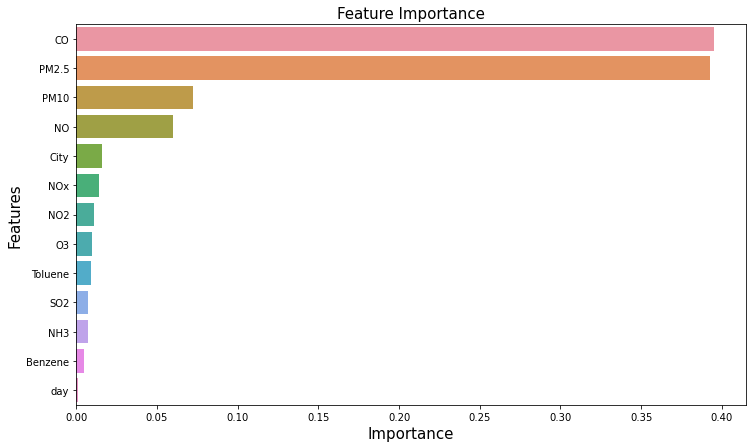

In [133]:
plt.figure(figsize = (12,7))
important_features = pd.DataFrame({'Features': x.columns, 
                                   'Importance': xgb.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# Stacking Regressor

In [94]:
estimators = [('rnd', RandomForestRegressor(random_state=100,max_depth= 7,min_samples_split=3 ,n_estimators = 150)),
              ('gb', GradientBoostingRegressor(alpha = 0.1,learning_rate = 0.1,max_depth = 4))]
reg = StackingRegressor(estimators=estimators,final_estimator=XGBRegressor(gamma = 4,learning_rate = 0.1,max_depth = 5))

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('rnd',
                               RandomForestRegressor(max_depth=7,
                                                     min_samples_split=3,
                                                     n_estimators=150,
                                                     random_state=100)),
                              ('gb',
                               GradientBoostingRegressor(alpha=0.1,
                                                         max_depth=4))],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               enable_categorical=False,
                                               gamma=4, gpu_id=N...
                                               interaction_constraints

In [98]:
reg.score(X_test,y_test)

0.9039224306154665